#Getting started
* I will explain everyting as begginer


In [123]:
val = 'something'
type(val)

str

#pandas example


In [124]:
import pandas as pd
df = pd.DataFrame({
    'first_name': ['sarah', 'John', 'Kyle', 'Joe'],
    'last_name' : ['Connor', 'Connor', 'Reese', "bonnot"]
})
df.set_index('last_name', inplace=True)
df

,first_name
last_name,
Connor,sarah
Connor,John
Reese,Kyle
bonnot,Joe


#Something changed
[link]('www.google.com')


In [125]:
# pd.read_csv("sample_data/mnist_test.csv")


#COLAB DAY TWO


#Q1. What dose my data show? Common parameters
ans. Here we are going to use layered graammar of graphics framework, which was proposed by hadley wickham,

## Layred graphics is:
* Data
* Aesthitic mapping
* geometic object
* scales
* facet specification
* statistical transformation
* coordinate system

#A picture is worth a thousand words

##Effective data visualization is both an art as well as a science


###"The Greatest value of a picture is when it forces us to notice what we never expected to see"


In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
import requests
import os

In [127]:
%matplotlib inline

In [128]:
def download_file(file_name:str, url:str):
  # url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/winequality-white.csv"
  # file_name = 'white_wine.csv'
  print('downloading file')
  print(file_name)


  dir = os.getcwd()
  file_dir = dir + '/' + file_name
  if file_name in os.listdir():
      print('File already exists at run time')
  else:
      # url = 'https://raw.githubusercontent.com/aniketkalra11/ball_file/main/rating_data_10_19.csv'
      r = requests.get(url)
      print('Downloading file')
      print('File saved as:', file_name)
      f_w = open(file_name, 'wb')
      f_w.write(r.content)
      f_w.close()

In [129]:
red_wine = 'red_wine.csv'
red_wine_url = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
download_file(red_wine, red_wine_url)

white_wine = "white_wine.csv"
white_wine_url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/winequality-white.csv"
download_file(white_wine, white_wine_url)


downloading file
red_wine.csv
File already exists at run time
downloading file
white_wine.csv
File already exists at run time


In [130]:
white_wine_pd = pd.read_csv(white_wine, sep=',')
red_wine_pd = pd.read_csv(red_wine, sep=',')

In [131]:
red_wine_pd['wine_type'] = 'red'
white_wine_pd['wine_type'] = 'white'
quality_labels = ['low', 'high', 'medium']
red_wine_pd['quality_label'] = red_wine_pd['quality'].apply(lambda value: 'low'
                                                            if value <=5 else 'medium'
                                                            if value <= 7 else 'high')

red_wine_pd['quality_label'] = pd.Categorical(red_wine_pd['quality_label'],
                                              categories= quality_labels)

white_wine_pd['quality_label'] = white_wine_pd['quality'].apply(lambda value: 'low'
                                                                if value <=5 else 'medium'
                                                                if value <=7 else 'high')
white_wine_pd['quality_label'] = pd.Categorical(white_wine_pd['quality_label'],
                                                categories= quality_labels)

wines_pd = pd.concat([red_wine_pd, white_wine_pd])

wines_pd = wines_pd.sample(frac=1, random_state=42).reset_index(drop=True)
wines_pd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [132]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates',
                     'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine_pd[subset_attributes].describe(), 2)
ws = round(white_wine_pd[subset_attributes].describe(), 2)

pd.concat([rs, ws], axis=1, keys=['Red Wine Stats', 'White Wine Stats'])

Red Wine Stats                                                           \
      residual sugar total sulfur dioxide sulphates  alcohol volatile acidity   
count        1599.00              1599.00   1599.00  1599.00          1599.00   
mean            2.54                46.47      0.66    10.42             0.53   
std             1.41                32.90      0.17     1.07             0.18   
min             0.90                 6.00      0.33     8.40             0.12   
25%             1.90                22.00      0.55     9.50             0.39   
50%             2.20                38.00      0.62    10.20             0.52   
75%             2.60                62.00      0.73    11.10             0.64   
max            15.50               289.00      2.00    14.90             1.58   

               White Wine Stats                                          \
       quality   residual sugar total sulfur dioxide sulphates  alcohol   
count  1599.00          4898.00              4898.00   4898.00  4898.00   
mean      5.64             6.39               138.36      0.49    10.51   
std       0.81             5.07                42.50      0.11     1.23   
min       3.00             0.60                 9.00      0.22     8.00   
25%       5.00             1.70               108.00      0.41     9.50   
50%       6.00             5.20               134.00      0.47    10.40   
75%       6.00             9.90               167.00      0.55    11.40   
max       8.00            65.80               440.00      1.08    14.20   

                                 
      volatile acidity  quality  
count          4898.00  4898.00  
mean              0.28     5.88  
std               0.10     0.89  
min               0.08     3.00  
25%               0.21     5.00  
50%               0.26     6.00  
75%               0.32     6.00  
max               1.10     9.00

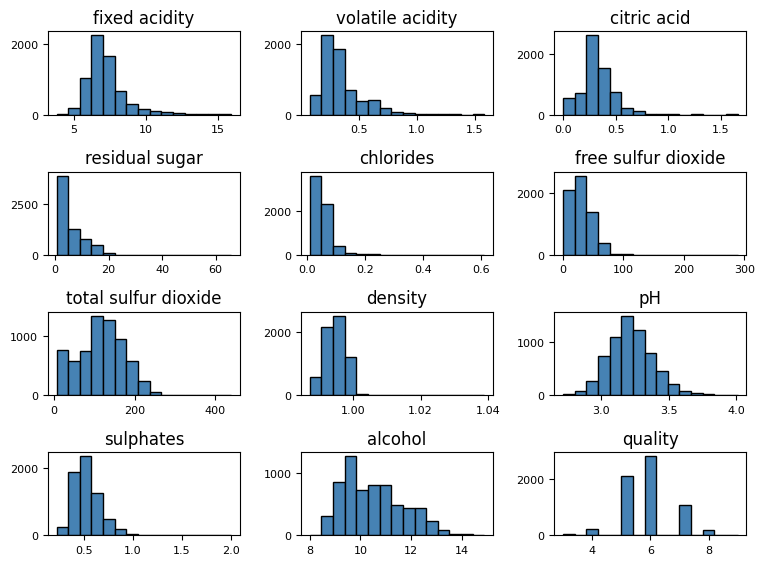

In [133]:
wines_pd.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize= 8, grid= False)
#* These following parameters for the good visualization
# wines_pd.hist()
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
# plt.show()

Drill down deaper in the visualiztion section

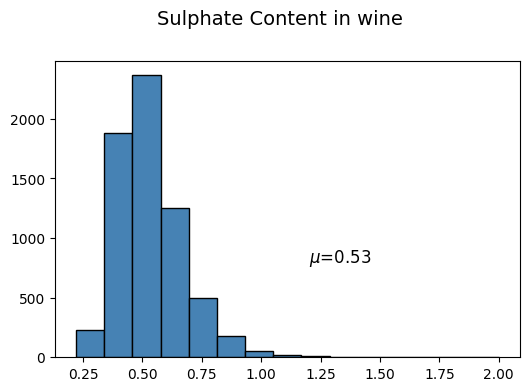

In [134]:
# Histogram
fig = plt.figure(figsize= (6, 4))
title = fig.suptitle("Sulphate Content in wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel= ("Sulphate")
ax.set_ylabel = ("Frequeency")
ax.text(1.2, 800, r'$\mu$='+str(round(wines_pd['sulphates'].mean(), 2)),
        fontsize= 12)

freq, bins, patches = ax.hist(wines_pd['sulphates'], color='steelblue', bins=15,
                              edgecolor='black', linewidth=1)

<Axes: xlabel='Sulphates', ylabel='Frequencey'>

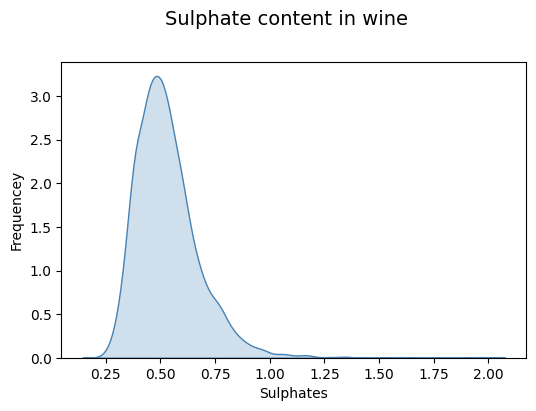

In [135]:
# Density Plot
fig_size = (6, 4)
fig = plt.figure(figsize = fig_size)
title = fig.suptitle("Sulphate content in wine", fontsize= 14)
fig.subplots_adjust(top=0.85, wspace= 0.3)

ax1 = fig.add_subplot(1, 1, 1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequencey")

sns.kdeplot(wines_pd['sulphates'], ax=ax1, fill=True, color='steelblue')

#Bar PLOT

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64
([6, 5, 7, 4, 8, 3, 9], [2836, 2138, 1079, 216, 193, 30, 5])


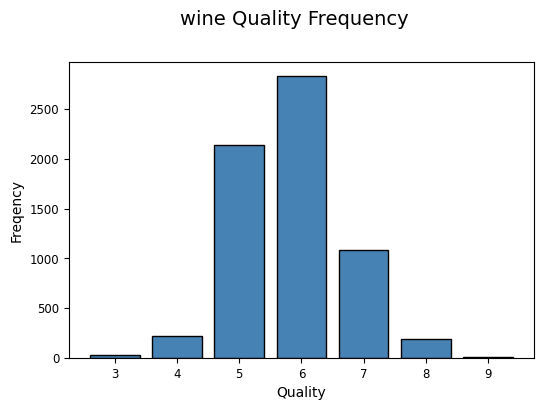

In [136]:
# Bar plot
fig = plt.figure(figsize=fig_size)
top, wspace = (0.85, 0.3)
title = fig.suptitle("wine Quality Frequency", fontsize=14)
fig.subplots_adjust(top=top, wspace=wspace)
ax_p = fig.add_subplot(1, 1, 1)
ax_p.set_xlabel("Quality")
ax_p.set_ylabel("Freqency")
w_q = wines_pd['quality'].value_counts()
print(w_q)
w_q = (list(w_q.index), list(w_q.values))
print(w_q)
ax_p.tick_params(axis='both',  which='major', labelsize=8.5)
bar = ax_p.bar(w_q[0], w_q[1], color='steelblue',
               edgecolor='black', linewidth=1)

#Multivariate Anaysis

1.5.3
0.12.2
3.7.1


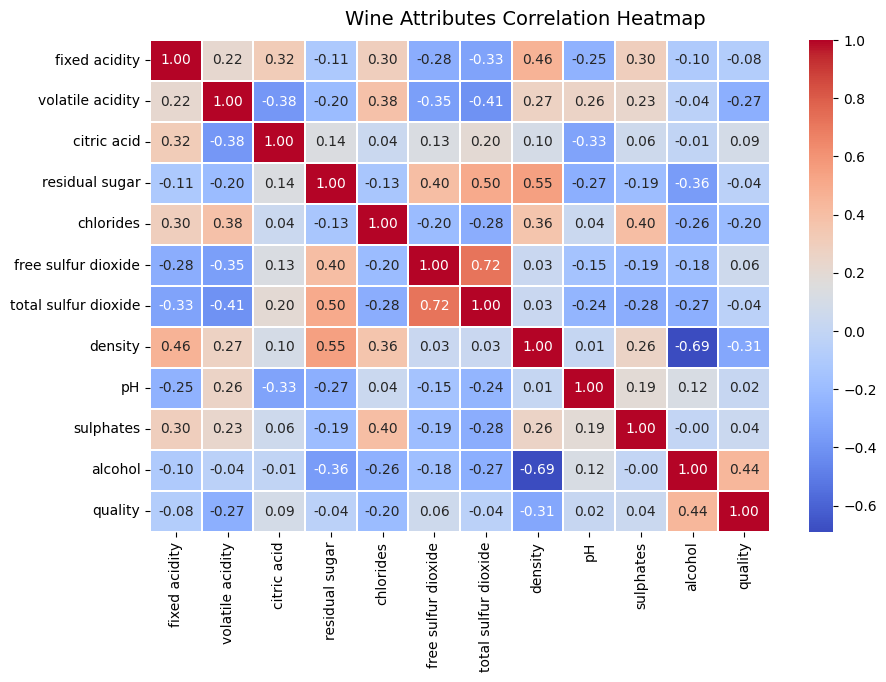

In [137]:
f, ax = plt.subplots(figsize=(10, 6))
corr = wines_pd.corr(numeric_only=True)
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
print(pd.__version__)
print(sns.__version__)
import matplotlib
print(matplotlib.__version__)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)


# Pair wise subplots
This is one the basic example of jupyter notebook

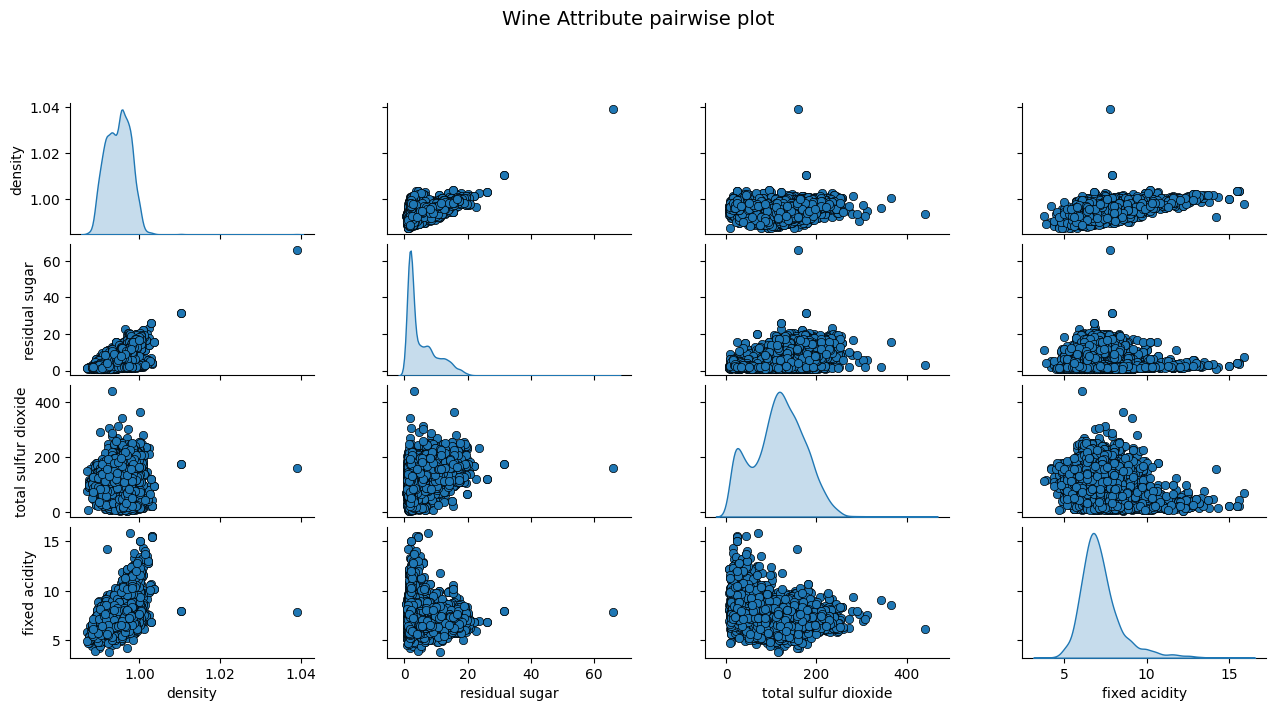

In [138]:
# pair Wise scatter plot
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
pair_wise_plot =  sns.pairplot(wines_pd[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))

fig = pair_wise_plot.fig
fig.subplots_adjust(top=top, wspace=wspace)
t = fig.suptitle('Wine Attribute pairwise plot', fontsize=14)

# Parallel coordinates

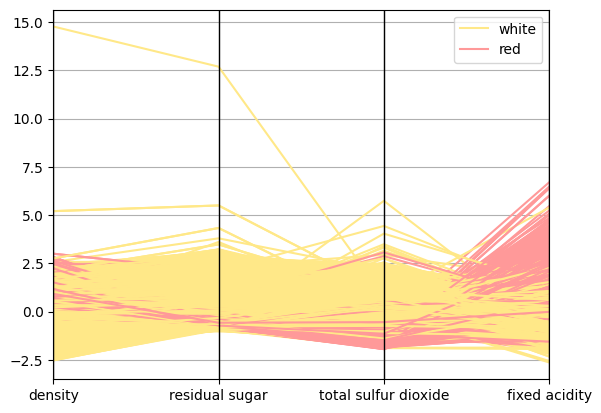

In [139]:
# scalling attributes values to avoid few outliers
subset_df = wines_pd[cols]
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scaled_df = standard_scaler.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)

final_df = pd.concat([scaled_df, wines_pd['wine_type']], axis=1)
final_df.head()

# plot parallel
from pandas.plotting import parallel_coordinates

pc = parallel_coordinates(final_df, 'wine_type', color=('#FFE888', '#FF9999'))

# Mix and match of scatter plot

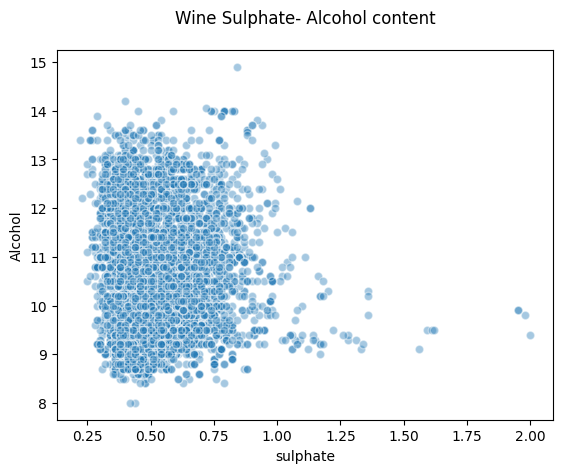

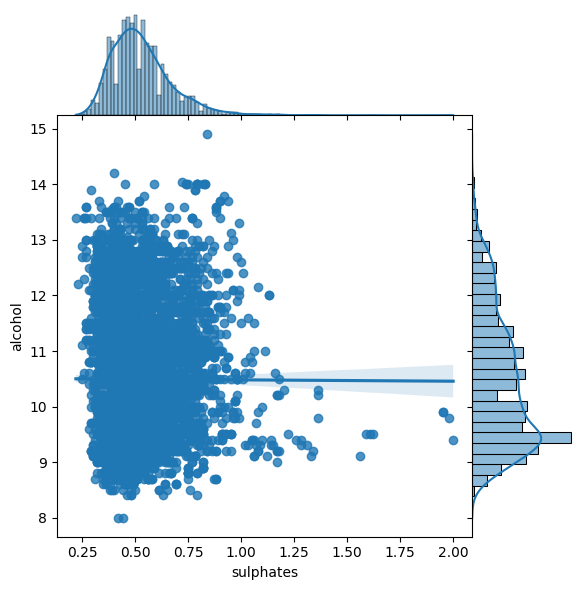

In [140]:
#scatter plot
plt.scatter(wines_pd['sulphates'], wines_pd['alcohol'],
            alpha=0.4, edgecolors='w')
plt.xlabel('sulphate')
plt.ylabel('Alcohol')
plt.title('Wine Sulphate- Alcohol content', y=1.05)

#joint plot
jp= sns.jointplot(x='sulphates', y='alcohol', data=wines_pd,
                 kind='reg', space=0, ratio=4)



# That's enough for now we will learn as we go alone
## List of items I learned today
* using basic notebook IDE's
* how to create basic charts and bar charts
* New libs added into the bucket list those are
  * seaboarn as sns
  * matplotlib
  * scipy
  * sklearn
  * pandas for csv files
  * etc etc.
* I have created basic multi variate plots, normal scatter plots

In [141]:
print('Thank you')

Thank you


In [142]:
from sklearn.impute import SimpleImputer
import seaborn as sns
imputer = SimpleImputer(strategy="median")

<Axes: xlabel='fixed acidity', ylabel='density'>

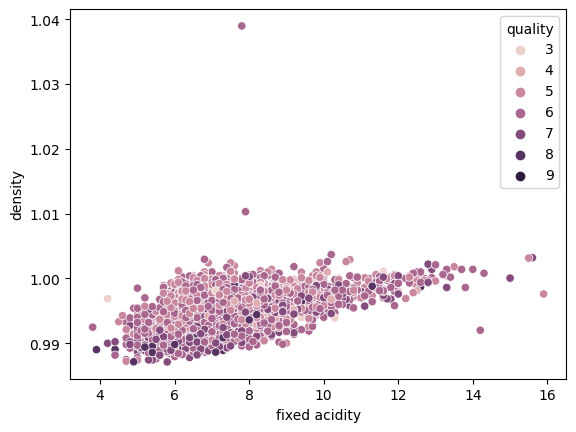

In [143]:
sns.scatterplot(x='fixed acidity', y='density', hue='quality', data=wines_pd)

<Axes: xlabel='fixed acidity', ylabel='density'>

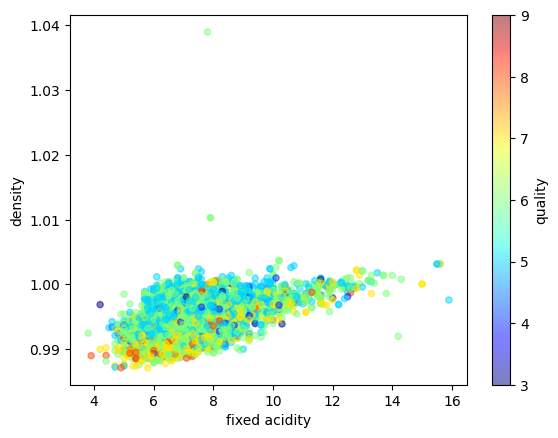

In [144]:
wines_pd.plot(kind='scatter', x='fixed acidity', y='density', alpha=0.5,
              c='quality', cmap=plt.get_cmap('jet'))

In [145]:
corelation_matrix = wines_pd.corr()
corelation_matrix

/tmp/ipykernel_765/2550290015.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation_matrix = wines_pd.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [146]:
corelation_matrix['quality']

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

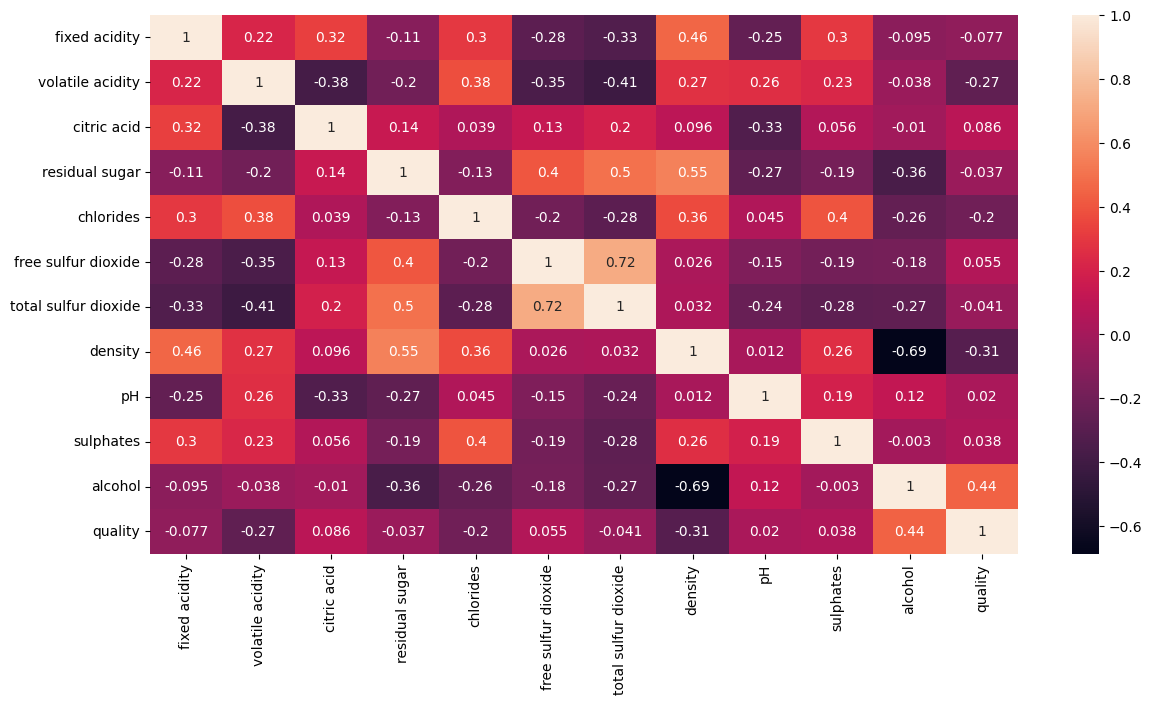

In [147]:
plt.figure(figsize=(14, 7))
# sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm')
sns.heatmap(corelation_matrix, annot=True)

array([[<Axes: xlabel='citric acid', ylabel='citric acid'>,
        <Axes: xlabel='pH', ylabel='citric acid'>,
        <Axes: xlabel='alcohol', ylabel='citric acid'>,
        <Axes: xlabel='sulphates', ylabel='citric acid'>,
        <Axes: xlabel='quality', ylabel='citric acid'>],
       [<Axes: xlabel='citric acid', ylabel='pH'>,
        <Axes: xlabel='pH', ylabel='pH'>,
        <Axes: xlabel='alcohol', ylabel='pH'>,
        <Axes: xlabel='sulphates', ylabel='pH'>,
        <Axes: xlabel='quality', ylabel='pH'>],
       [<Axes: xlabel='citric acid', ylabel='alcohol'>,
        <Axes: xlabel='pH', ylabel='alcohol'>,
        <Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='sulphates', ylabel='alcohol'>,
        <Axes: xlabel='quality', ylabel='alcohol'>],
       [<Axes: xlabel='citric acid', ylabel='sulphates'>,
        <Axes: xlabel='pH', ylabel='sulphates'>,
        <Axes: xlabel='alcohol', ylabel='sulphates'>,
        <Axes: xlabel='sulphates', ylabel='sulphates'>,
  

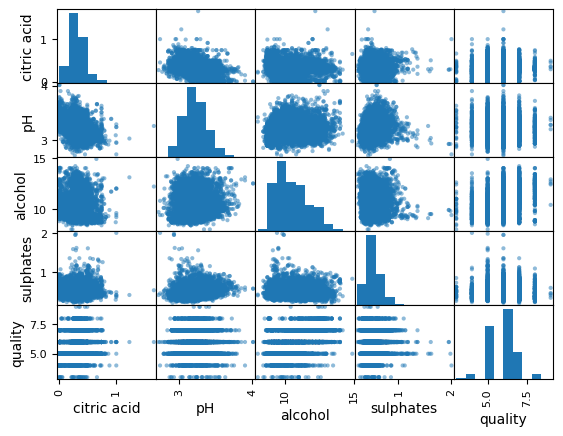

In [148]:
from pandas.plotting import scatter_matrix
attribute_list = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality']
scatter_matrix(wines_pd[attribute_list])

In [149]:
wine_features = wines_pd.drop('quality', axis=1)

wine_labels = wines_pd['quality'].copy()
wine_features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality_label
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,white,high
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,red,low
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,white,medium
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,white,medium
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,white,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,white,low
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,white,medium
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,white,low
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,white,low


In [150]:
wine_features.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
wine_type               0
quality_label           0
dtype: int64

In [151]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [152]:
wine_features
# imputer.fit(wine_features)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality_label
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,white,high
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,red,low
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,white,medium
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,white,medium
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,white,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,white,low
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,white,medium
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,white,low
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,white,low


In [155]:
wine_features = wines_pd.copy()
wine_features_copy = wine_features.copy()
filtered_one = wine_features.drop('wine_type', axis=1)
final_filter = filtered_one.drop('quality_label', axis=1)
wine_features = final_filter

wine_features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5


In [156]:
imputer.fit(wine_features)
imputer.statistics_

array([7.0000e+00, 2.9000e-01, 3.1000e-01, 3.0000e+00, 4.7000e-02,
       2.9000e+01, 1.1800e+02, 9.9489e-01, 3.2100e+00, 5.1000e-01,
       1.0300e+01, 6.0000e+00])

In [158]:
wine_features.median()

fixed acidity             7.00000
volatile acidity          0.29000
citric acid               0.31000
residual sugar            3.00000
chlorides                 0.04700
free sulfur dioxide      29.00000
total sulfur dioxide    118.00000
density                   0.99489
pH                        3.21000
sulphates                 0.51000
alcohol                  10.30000
quality                   6.00000
dtype: float64

In [159]:
tr_features = imputer.transform(wine_features)
tr_features.shape

(6497, 12)

# Converting Categorical into numberical attributes
